## valence and arousal for each song

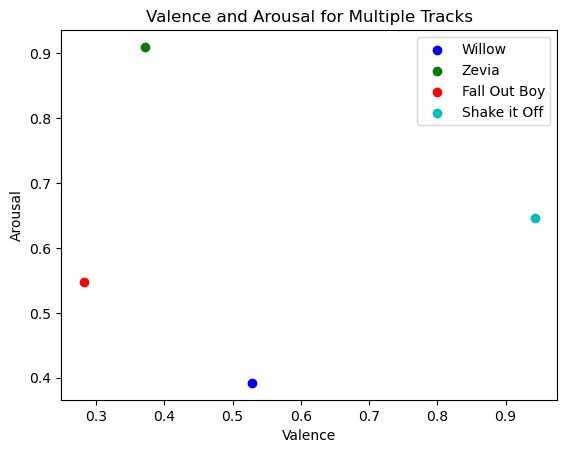

In [13]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

# Set up Spotify API credentials
client_id = '8a9262cf15dd4e16bd72737b6e6a93ee'
client_secret = '1b7eb12115884c8eb165f3291eaa55c6'
redirect_uri = 'https://en.wikipedia.org/wiki/India'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_id(track_name):
    """Get the Spotify track ID for a given track name."""
    results = sp.search(q='track:' + track_name, type='track')
    return results['tracks']['items'][0]['id']

def get_track_features(track_id):
    """Get the valence and arousal (danceability) for a given track ID."""
    features = sp.audio_features([track_id])
    valence = features[0]['valence']
    arousal = features[0]['danceability']
    return valence, arousal

def plot_valence_arousal(track_names):
    """Plot the valence and arousal for a list of tracks."""
    fig, ax = plt.subplots()
    cursor = mplcursors.cursor(ax)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more colors if you have more than 7 songs

    for i, track_name in enumerate(track_names):
        track_id = get_track_id(track_name)
        valence, arousal = get_track_features(track_id)
        scatter = ax.scatter([valence], [arousal], c=colors[i % len(colors)], label=track_name)

    ax.set_xlabel('Valence')
    ax.set_ylabel('Arousal')
    ax.set_title('Valence and Arousal for Multiple Tracks')
    ax.legend(loc='best')
    plt.show()

track_names = ['Willow', 'Zevia', 'Fall Out Boy', 'Shake it Off']  # Replace with your list of song names
plot_valence_arousal(track_names)


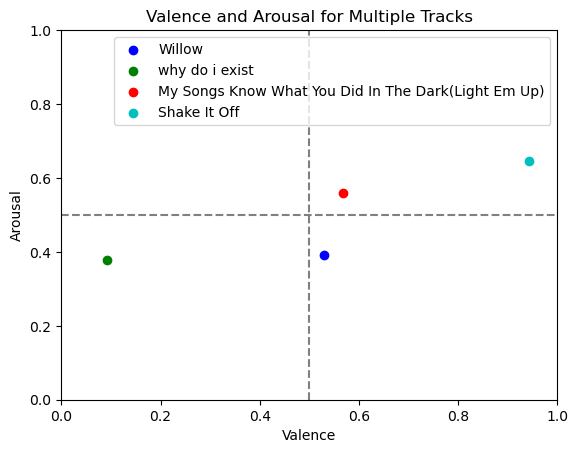

In [14]:
def plot_valence_arousal(track_names):
    """Plot the valence and arousal for a list of tracks."""
    fig, ax = plt.subplots()
    cursor = mplcursors.cursor(ax)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more colors if you have more than 7 songs

    for i, track_name in enumerate(track_names):
        track_id = get_track_id(track_name)
        valence, arousal = get_track_features(track_id)
        scatter = ax.scatter([valence], [arousal], c=colors[i % len(colors)], label=track_name)

    ax.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
    ax.set_ylim(0, 1)  # Set y-axis limits from 0 to 1
    ax.axvline(x=0.5, color='gray', linestyle='--')  # Add a vertical line at x=0.5
    ax.axhline(y=0.5, color='gray', linestyle='--')  # Add a horizontal line at y=0.5
    ax.set_xlabel('Valence')
    ax.set_ylabel('Arousal')
    ax.set_title('Valence and Arousal for Multiple Tracks')
    ax.legend(loc='best')
    plt.show()

track_names = ['Willow', 'why do i exist', 'My Songs Know What You Did In The Dark(Light Em Up)', 'Shake It Off']  # Replace with your list of song names
plot_valence_arousal(track_names)


## graph for euclidean distances with and without video

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

# Set up Spotify API credentials
client_id = '8a9262cf15dd4e16bd72737b6e6a93ee'
client_secret = '1b7eb12115884c8eb165f3291eaa55c6'
redirect_uri = 'https://en.wikipedia.org/wiki/India'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_id(track_name):
    """Get the Spotify track ID for a given track name."""
    results = sp.search(q='track:' + track_name, type='track')
    return results['tracks']['items'][0]['id']

def get_track_features(track_id):
    """Get the valence and arousal (danceability) for a given track ID."""
    features = sp.audio_features([track_id])
    valence = features[0]['valence']
    arousal = features[0]['danceability']
    return {'valence': valence, 'arousal': arousal}

def get_tracks_data(track_names):
    """Get valence and arousal data for a list of tracks."""
    tracks_data = {}
    for track_name in track_names:
        track_id = get_track_id(track_name)
        track_features = get_track_features(track_id)
        tracks_data[track_name] = track_features
    return tracks_data

track_names = ['Willow', 'Zevia', 'Fall Out Boy', 'Shake it Off']  # Replace with your list of song names
tracks_data = get_tracks_data(track_names)
print(tracks_data)


{'Willow': {'valence': 0.529, 'arousal': 0.392}, 'Zevia': {'valence': 0.372, 'arousal': 0.91}, 'Fall Out Boy': {'valence': 0.282, 'arousal': 0.547}, 'Shake it Off': {'valence': 0.943, 'arousal': 0.647}}


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


# Assuming you have a CSV file named 'responses.csv'
df = pd.read_csv('combined_file.csv')
df['video'] = df.iloc[:, 14]
df['Valence_value']=df.iloc[:, 10]
df['Arousal_value']=df.iloc[:, 11]

In [6]:
# Keep only the desired columns
df = df[['Song', 'Valence_value', 'Arousal_value', 'video']]
df = df.dropna(subset=['video'])

print(df)

            Song  Valence_value  Arousal_value video
0         Willow              7              5    No
1          Zevia              3              2    No
2   Fall Out Boy              9              9    No
3   Shake it Off              6              8    No
4         Willow              7              7    No
5         Willow              8              9   Yes
6          Zevia              3              1   Yes
7   Fall Out Boy              7             10   Yes
8   Shake it Off              6              7   Yes
9         Willow              9              4   Yes
10        Willow              8              3   Yes
11         Zevia             10              8   Yes
12  Fall Out Boy              2              7   Yes
13  Shake it Off             10              9   Yes
14        Willow              4              7   Yes
15        Willow              9              9    No
16         Zevia              3              3    No


In [7]:
df_willow_yes = df[(df['Song'] == 'Willow') & (df['video'] == 'Yes')]
df_willow_no = df[(df['Song'] == 'Willow') & (df['video'] == 'No')]
euclidean_distances_yes = []
euclidean_distances_no = []
for index, row in df_willow_yes.iterrows():
    x = row['Valence_value']
    y = row['Arousal_value']
    x0 = tracks_data['Willow']['valence']
    y0 = tracks_data['Willow']['arousal']
    euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
    euclidean_distances_yes.append(euclidean_distance)

# Calculate Euclidean distance for 'no' video
for index, row in df_willow_no.iterrows():
    x = row['Valence_value']
    y = row['Arousal_value']
    x0 = tracks_data['Willow']['valence']
    y0 = tracks_data['Willow']['arousal']
    euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
    euclidean_distances_no.append(euclidean_distance)

print("Euclidean distances for 'willow' with video 'yes':", euclidean_distances_yes)
print("Euclidean distances for 'willow' with video 'no':", euclidean_distances_no)

Euclidean distances for 'willow' with video 'yes': [11.397960563188487, 9.20736145700819, 7.913122329396911, 7.464147975489231]
Euclidean distances for 'willow' with video 'no': [7.944023225041578, 9.248756943503272, 12.077065247815796]


In [8]:
euclidean_distances = {}

# Iterate over each unique song
for song in df['Song'].unique():
    # Filter the DataFrame for the current song and videos labeled as 'Yes' and 'No'
    df_song_yes = df[(df['Song'] == song) & (df['video'] == 'Yes')]
    df_song_no = df[(df['Song'] == song) & (df['video'] == 'No')]
    
    # Initialize arrays to store Euclidean distances for the current song
    euclidean_distances_yes = []
    euclidean_distances_no = []
    
    # Calculate Euclidean distance for 'Yes' video
    for index, row in df_song_yes.iterrows():
        x = row['Valence_value']
        y = row['Arousal_value']
        x0 = tracks_data[song]['valence']
        y0 = tracks_data[song]['arousal']
        euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
        euclidean_distances_yes.append(euclidean_distance)
    
    # Calculate Euclidean distance for 'No' video
    for index, row in df_song_no.iterrows():
        x = row['Valence_value']
        y = row['Arousal_value']
        x0 = tracks_data[song]['valence']
        y0 = tracks_data[song]['arousal']
        euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
        euclidean_distances_no.append(euclidean_distance)
    
    # Store Euclidean distances in the dictionary
    euclidean_distances[song] = {'yes': euclidean_distances_yes, 'no': euclidean_distances_no}

# Print Euclidean distances for each song
for song, distances in euclidean_distances.items():
    print(f"Euclidean distances for '{song}' with video 'Yes':", distances['yes'])
    print(f"Euclidean distances for '{song}' with video 'No':", distances['no'])

Euclidean distances for 'Willow' with video 'Yes': [11.397960563188487, 9.20736145700819, 7.913122329396911, 7.464147975489231]
Euclidean distances for 'Willow' with video 'No': [7.944023225041578, 9.248756943503272, 12.077065247815796]
Euclidean distances for 'Zevia' with video 'Yes': [2.6295406442951212, 11.956859286618707]
Euclidean distances for 'Zevia' with video 'No': [2.8450806666947077, 3.3577498417839293]
Euclidean distances for 'Fall Out Boy' with video 'Yes': [11.597013969121534, 6.677779046958652]
Euclidean distances for 'Fall Out Boy' with video 'No': [12.143176396643508]
Euclidean distances for 'Shake it Off' with video 'Yes': [8.119966625547177, 12.320789666251105]
Euclidean distances for 'Shake it Off' with video 'No': [8.924116650963276]


In [9]:
import numpy as np
import pandas as pd

euclidean_distances = {}

# Iterate over each unique song
for song in df['Song'].unique():
    # Filter the DataFrame for the current song and videos labeled as 'Yes' and 'No'
    df_song_yes = df[(df['Song'] == song) & (df['video'] == 'Yes')]
    df_song_no = df[(df['Song'] == song) & (df['video'] == 'No')]
    
    # Initialize arrays to store Euclidean distances for the current song
    euclidean_distances_yes = []
    euclidean_distances_no = []
    
    # Calculate Euclidean distance for 'Yes' video
    for index, row in df_song_yes.iterrows():
        x = row['Valence_value']
        y = row['Arousal_value']
        x0 = tracks_data[song]['valence']
        y0 = tracks_data[song]['arousal']
        euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
        euclidean_distances_yes.append(euclidean_distance)
    
    # Calculate Euclidean distance for 'No' video
    for index, row in df_song_no.iterrows():
        x = row['Valence_value']
        y = row['Arousal_value']
        x0 = tracks_data[song]['valence']
        y0 = tracks_data[song]['arousal']
        euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
        euclidean_distances_no.append(euclidean_distance)
    
    # Take the average of Euclidean distances for each song
    avg_distance_yes = np.mean(euclidean_distances_yes)
    avg_distance_no = np.mean(euclidean_distances_no)
    
    # Store average Euclidean distances in the dictionary
    euclidean_distances[song] = {'yes': avg_distance_yes, 'no': avg_distance_no}

# Print average Euclidean distances for each song
for song, distances in euclidean_distances.items():
    print(f"Average Euclidean distance for '{song}' with video 'Yes':", distances['yes'])
    print(f"Average Euclidean distance for '{song}' with video 'No':", distances['no'])


Average Euclidean distance for 'Willow' with video 'Yes': 8.995648081270705
Average Euclidean distance for 'Willow' with video 'No': 9.756615138786882
Average Euclidean distance for 'Zevia' with video 'Yes': 7.293199965456914
Average Euclidean distance for 'Zevia' with video 'No': 3.1014152542393187
Average Euclidean distance for 'Fall Out Boy' with video 'Yes': 9.137396508040093
Average Euclidean distance for 'Fall Out Boy' with video 'No': 12.143176396643508
Average Euclidean distance for 'Shake it Off' with video 'Yes': 10.22037814589914
Average Euclidean distance for 'Shake it Off' with video 'No': 8.924116650963276


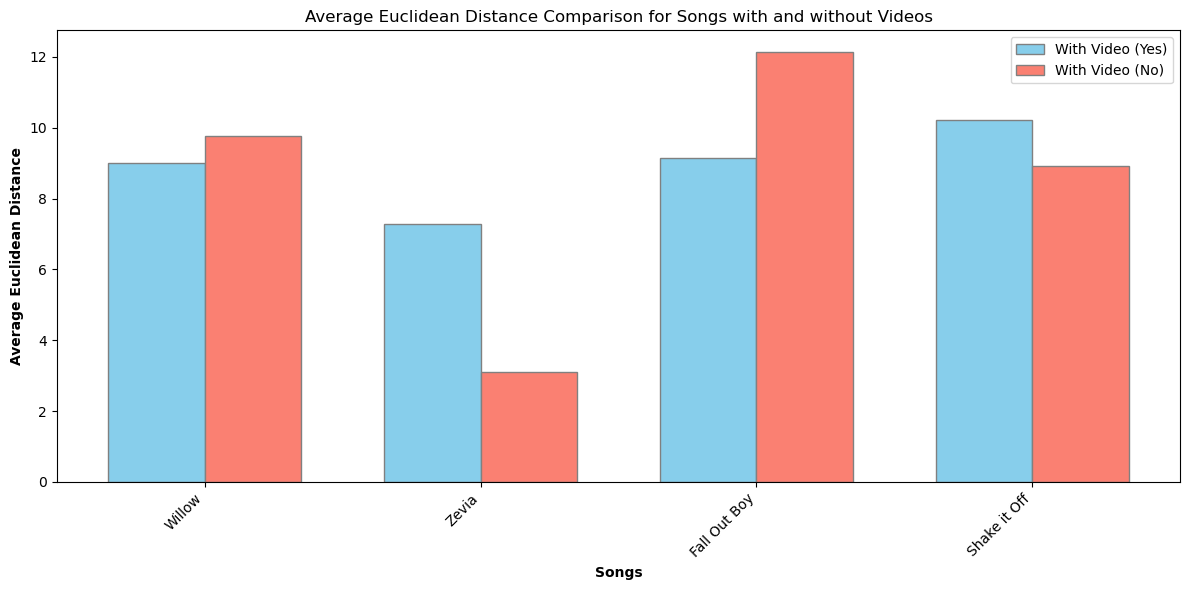

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Extract song names and average distances for songs with and without videos
songs = list(euclidean_distances.keys())
avg_distances_yes = [distances['yes'] for distances in euclidean_distances.values()]
avg_distances_no = [distances['no'] for distances in euclidean_distances.values()]

# Set the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(songs))
r2 = [x + bar_width for x in r1]

# Create side-by-side bar chart
plt.figure(figsize=(12, 6))
plt.bar(r1, avg_distances_yes, color='skyblue', width=bar_width, edgecolor='grey', label='With Video (Yes)')
plt.bar(r2, avg_distances_no, color='salmon', width=bar_width, edgecolor='grey', label='With Video (No)')

# Add xticks on the middle of the group bars
plt.xlabel('Songs', fontweight='bold')
plt.ylabel('Average Euclidean Distance', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(songs))], songs, rotation=45, ha='right')

# Create legend & Show graphic
plt.legend()
plt.title('Average Euclidean Distance Comparison for Songs with and without Videos')

# Show plot
plt.tight_layout()
plt.show()


## word clouds for songs recalled per song

In [50]:
import pandas as pd

# Load the first CSV file
df1 = pd.read_csv('cols.csv')

# Load the second CSV file
df2 = pd.read_csv('responses.csv')

# Append columns from df2 to df1
df1 = pd.concat([df1, df2], axis=1)

# Save the combined DataFrame to a new CSV file
df1.to_csv('combined_file.csv', index=False)


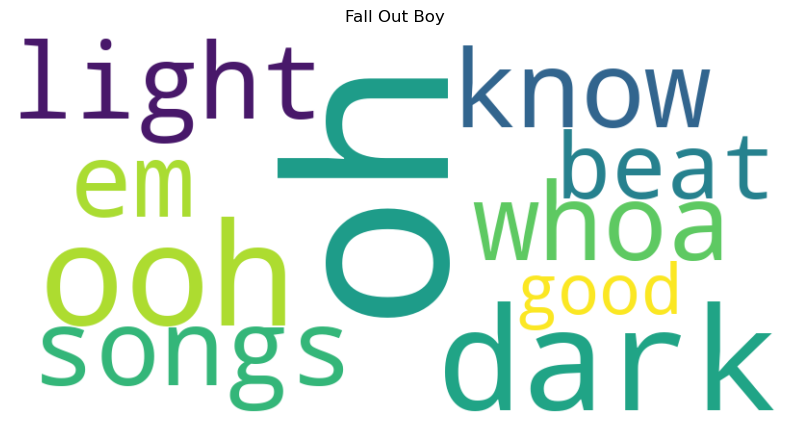

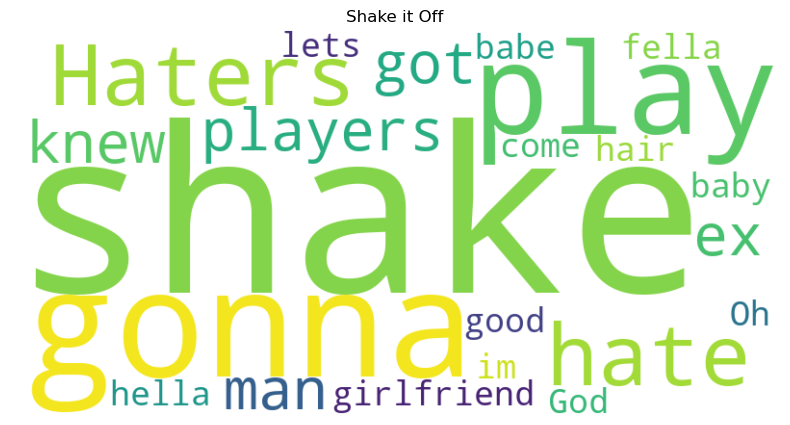

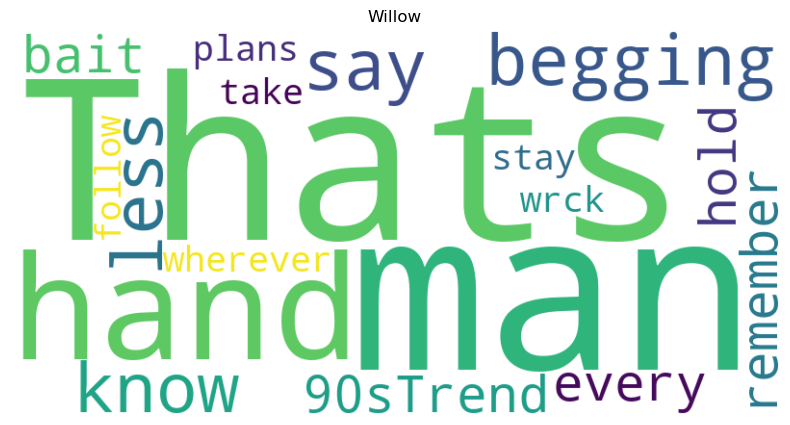

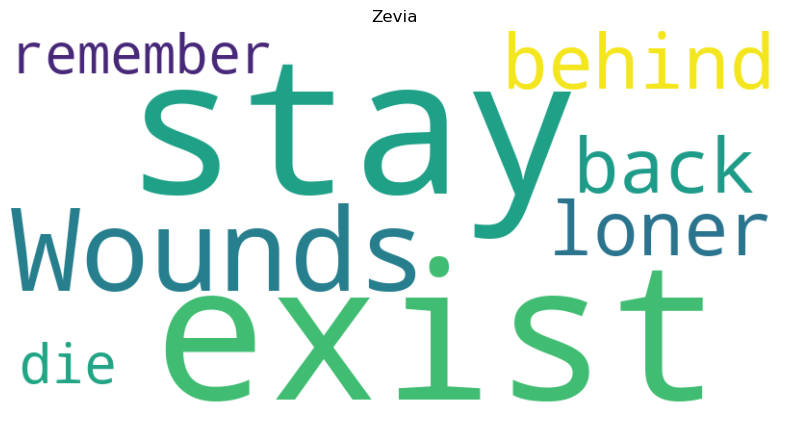

In [22]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("combined_file.csv")

# Group the DataFrame by the "Song" column
grouped = df.groupby('Song')

# Iterate over each group and generate word cloud
for song, group in grouped:
    # Concatenate the phrases/lines recalled for each song into a single string
    text = ' '.join(str(line) for line in group['Any lines/phrases/words you recall from the music.'] if pd.notnull(line))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(song)
    plt.axis('off')
    plt.show()


## Likeability vs group

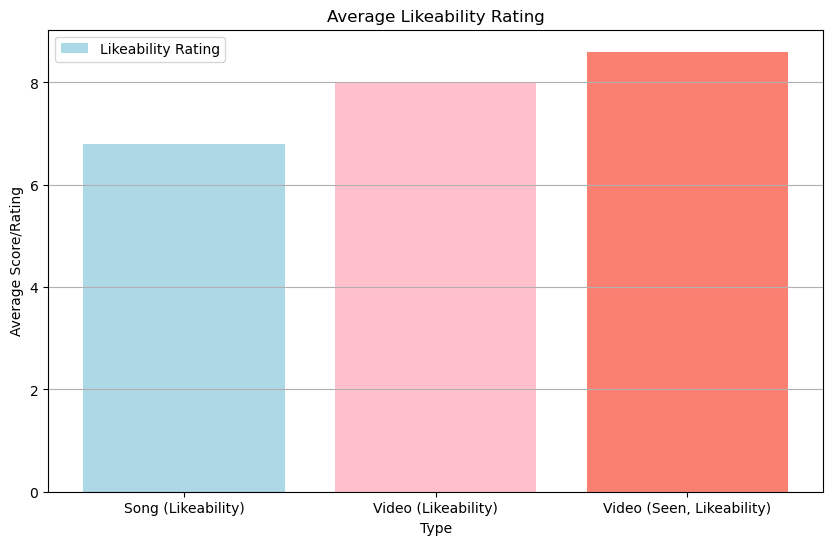

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('combined_file.csv')

# Calculate sentiment scores using TextBlob
# df['Sentiment'] = df['Lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Splitting the data based on the condition
song_video_match = df['Song'] == df['Video']
df_song = df[song_video_match]
df_video = df[~song_video_match]

# avg_sentiment_song = df_song['Sentiment'].mean()
# avg_sentiment_video = df_video['Sentiment'].mean()
avg_likeability_song = df_song['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video = df_video['Rate the overall liking of the song on a scale from 1 to 10.'].mean()

song_video_match = df['Song'] == df['Video']
df_song = df[song_video_match]
df_video = df[~song_video_match]

# Extracting cases where "Did you see the video" is 'Yes' but "Song" is not equal to "Video"
df_video_seen = df[(df['Did you the see the video'] == 'Yes') & (~song_video_match)]

# Calculate average sentiment score and average likeability rating for songs and videos
avg_sentiment_song = df_song['Sentiment'].mean()
avg_sentiment_video = df_video['Sentiment'].mean()
avg_sentiment_video_seen = df_video_seen['Sentiment'].mean()
avg_likeability_song = df_song['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video = df_video['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video_seen = df_video_seen['Rate the overall liking of the song on a scale from 1 to 10.'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# # Creating bar chart for sentiment scores
# plt.bar(['Song (Sentiment)', 'Video (Sentiment)', 'Video (Seen, Sentiment)'], 
#         [avg_sentiment_song, avg_sentiment_video, avg_sentiment_video_seen], 
#         color=['blue', 'red', 'orange'], label='Sentiment Score')

# Adding another set of bars for likeability ratings
plt.bar(['Song (Likeability)', 'Video (Likeability)', 'Video (Seen, Likeability)'], 
        [avg_likeability_song, avg_likeability_video, avg_likeability_video_seen], 
        color=['lightblue', 'pink', 'salmon'], label='Likeability Rating')

plt.title('Average Likeability Rating')
plt.xlabel('Type')
plt.ylabel('Average Score/Rating')
plt.legend()
plt.grid(axis='y')
plt.show()

## frequency vs group

### explain previous graph using this one

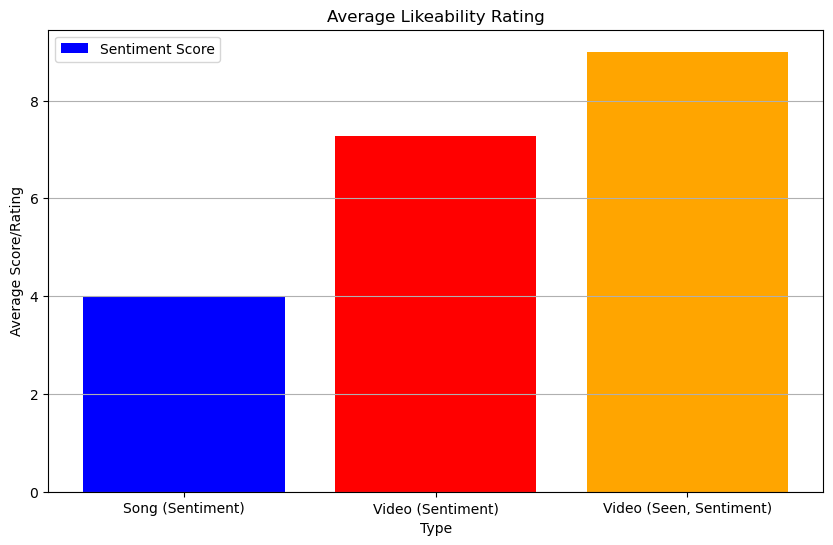

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('combined_file.csv')

# Calculate sentiment scores using TextBlob
# df['Sentiment'] = df['Lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Splitting the data based on the condition
song_video_match = df['Song'] == df['Video']
df_song = df[song_video_match]
df_video = df[~song_video_match]

# avg_sentiment_song = df_song['Sentiment'].mean()
# avg_sentiment_video = df_video['Sentiment'].mean()
avg_likeability_song = df_song['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video = df_video['Rate the overall liking of the song on a scale from 1 to 10.'].mean()

song_video_match = df['Song'] == df['Video']
df_song = df[song_video_match]
df_video = df[~song_video_match]

# Extracting cases where "Did you see the video" is 'Yes' but "Song" is not equal to "Video"
df_video_seen = df[(df['Did you the see the video'] == 'Yes') & (~song_video_match)]

# Calculate average sentiment score and average likeability rating for songs and videos
avg_sentiment_song = df_song['Sentiment'].mean()
avg_sentiment_video = df_video['Sentiment'].mean()
avg_sentiment_video_seen = df_video_seen['Sentiment'].mean()
avg_likeability_song = df_song['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video = df_video['Rate the overall liking of the song on a scale from 1 to 10.'].mean()
avg_likeability_video_seen = df_video_seen['Rate the overall liking of the song on a scale from 1 to 10.'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Creating bar chart for sentiment scores
plt.bar(['Song (Sentiment)', 'Video (Sentiment)', 'Video (Seen, Sentiment)'], 
        [avg_sentiment_song, avg_sentiment_video, avg_sentiment_video_seen], 
        color=['blue', 'red', 'orange'], label='Sentiment Score')

# Adding another set of bars for likeability ratings
# plt.bar(['Song (Likeability)', 'Video (Likeability)', 'Video (Seen, Likeability)'], 
#         [avg_likeability_song, avg_likeability_video, avg_likeability_video_seen], 
#         color=['lightblue', 'pink', 'salmon'], label='Likeability Rating')

plt.title('Average Likeability Rating')
plt.xlabel('Type')
plt.ylabel('Average Score/Rating')
plt.legend()
plt.grid(axis='y')
plt.show()

In [44]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanshikadhingra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vanshikadhingra/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [51]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('combined_file.csv')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Convert to lowercase to make stopwords consistent
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return len(filtered_words)

# Apply preprocessing to the column
df['Word Count'] = df['Any lines/phrases/words you recall from the music.'].apply(preprocess_text)

# Group by 'column type' and calculate the average word count
average_word_count_by_type = df.groupby('type')['Word Count'].mean()

print(average_word_count_by_type)


type
Corr       4.200000
NoVideo    3.571429
NonCorr    7.800000
Name: Word Count, dtype: float64


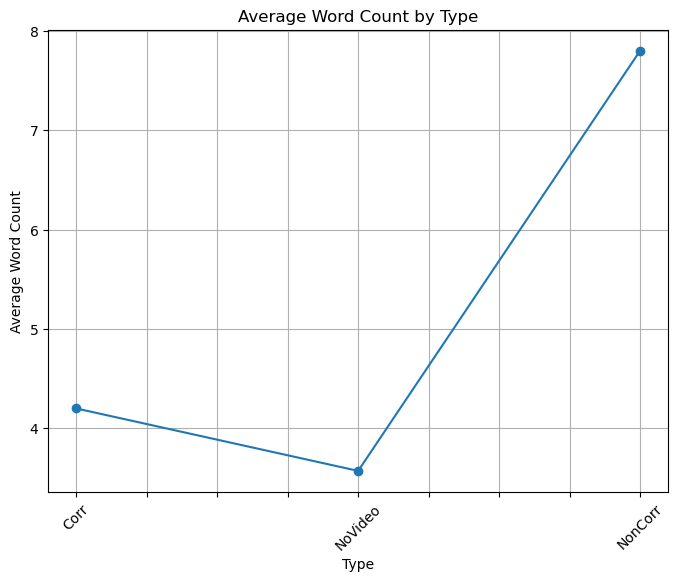

In [52]:
# Plotting
plt.figure(figsize=(8, 6))
average_word_count_by_type.plot(marker='o')
plt.title('Average Word Count by Type')
plt.xlabel('Type')
plt.ylabel('Average Word Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()